# AGUME KENNETH B30039

- Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [4]:
data = pd.read_csv("AirPassengers.csv")
data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,112,118,132,129,121,135,148,148,136,119,104,118
1,115,126,141,135,125,149,170,170,158,133,114,140
2,145,150,178,163,172,178,199,199,184,162,146,166
3,171,180,193,181,183,218,230,242,209,191,172,194
4,196,196,236,235,229,243,264,272,237,211,180,201
5,204,188,235,227,234,264,302,293,259,229,203,229
6,242,233,267,269,270,315,364,347,312,274,237,278
7,284,277,317,313,318,374,413,405,355,306,271,306
8,315,301,356,348,355,422,465,467,404,347,305,336
9,340,318,362,348,363,435,491,505,404,359,310,337


- Flattening the table

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Convert table to 1D array
values = data.values.flatten()

# Create monthly date range (1949–1960)
dates = pd.date_range(start="1949-01", periods=len(values), freq="M")

# Create time series
ts = pd.Series(values, index=dates)

print(ts.head())

1949-01-31    112
1949-02-28    118
1949-03-31    132
1949-04-30    129
1949-05-31    121
Freq: ME, dtype: int64


- Plotting to see the trends of the raw data

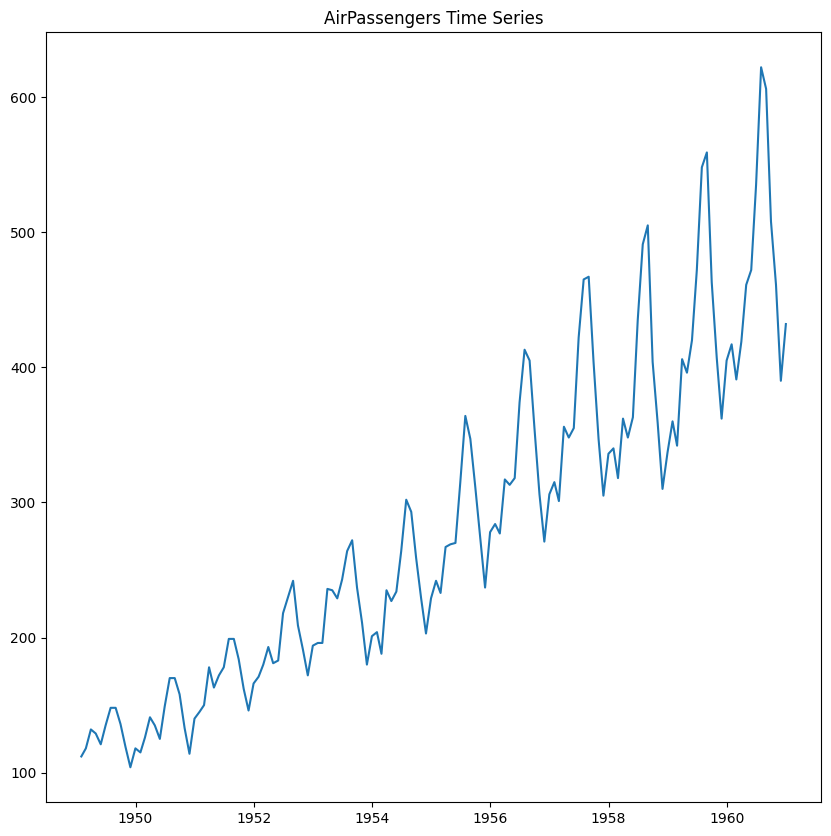

In [29]:
plt.figure(figsize=(10,10))
plt.plot(ts)
plt.title("AirPassengers Time Series")
plt.show()

# Plotting Raw Data vs 1st Differenced Data

- First Differencing

In [15]:
ts_diff = ts.diff(12).dropna()

- Plot comparison

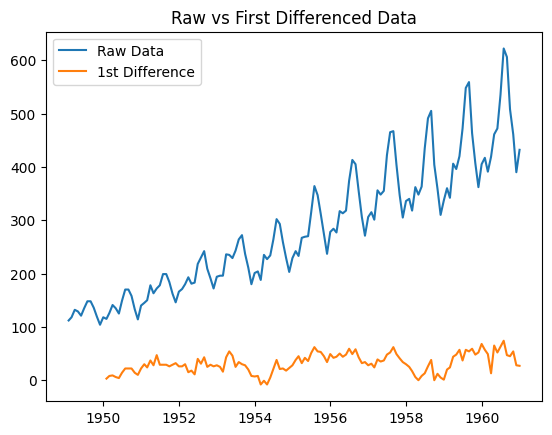

In [16]:
plt.figure()
plt.plot(ts, label="Raw Data")
plt.plot(ts_diff, label="1st Difference")
plt.legend()
plt.title("Raw vs First Differenced Data")
plt.show()

- It is observed that the raw data has a strong trend and seasonality while the differenced data fluctuates around a zero

- ACF & PACF Before Differencing

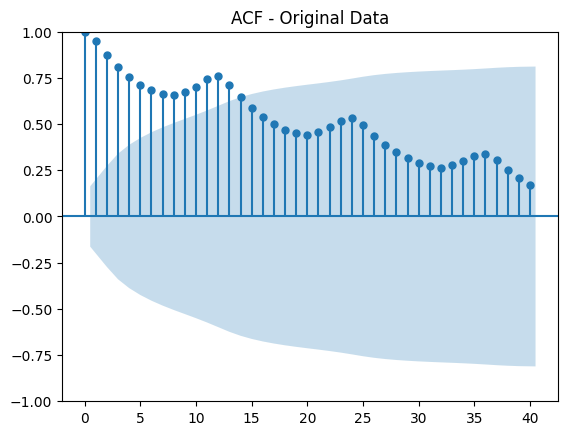

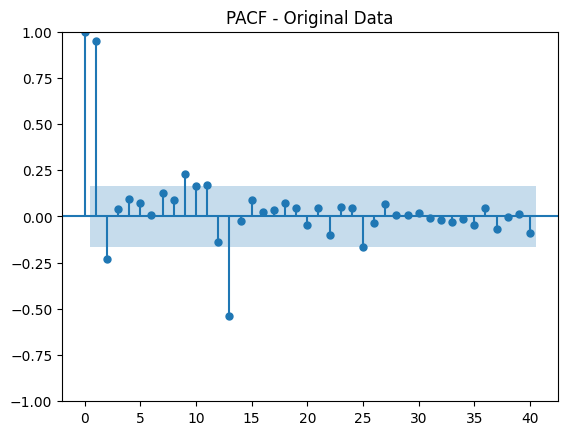

In [17]:
plot_acf(ts, lags=40)
plt.title("ACF - Original Data")
plt.show()
plot_pacf(ts, lags=40)
plt.title("PACF - Original Data")
plt.show()

- After first differencing, the ACF decreases much faster compared to the original data thus most of the values fall inside the confidence interval after a few lags, which shows that the trend has been removed. 
- However, there is still some significant autocorrelation at the first few lags, meaning the series still has short-term dependence. Overall, the differenced series appears to be stationary

- ADF Test 

In [35]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts)

adf_stat = result[0]
p_value = result[1]
critical_values = result[4]

print("ADF Statistic:", adf_stat)
print("p-value:", p_value)
print("Critical Values:", critical_values)

# Decision rule
if p_value < 0.05:
    print("Result: Reject the null hypothesis.")
    print("Conclusion: The series is stationary.")
else:
    print("Result: Fail to reject the null hypothesis.")
    print("Conclusion: The series is non-stationary.")

ADF Statistic: 0.8153688792060472
p-value: 0.991880243437641
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Result: Fail to reject the null hypothesis.
Conclusion: The series is non-stationary.


This shows that the Airpassenger data is non-staionary with a p-value of 0.991880243437641

- ADF Test After Differencing

In [34]:
result_diff = adfuller(ts_diff)

adf_stat_diff = result_diff[0]
p_value_diff = result_diff[1]
critical_values_diff = result_diff[4]

print("ADF Statistic (Differenced):", adf_stat_diff)
print("p-value (Differenced):", p_value_diff)
print("Critical Values:", critical_values_diff)

# Decision rule
if p_value_diff < 0.05:
    print("Result: Reject the null hypothesis.")
    print("Conclusion: The differenced series is stationary.")
else:
    print("Result: Fail to reject the null hypothesis.")
    print("Conclusion: The differenced series is still non-stationary.")

ADF Statistic (Differenced): -3.383020726492481
p-value (Differenced): 0.011551493085514952
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Result: Reject the null hypothesis.
Conclusion: The differenced series is stationary.


This shows that our Airpasseger data is now stationary with a p-value of 0.011551493085514952

- ACF & PACF After Differencing

<Figure size 1500x1500 with 0 Axes>

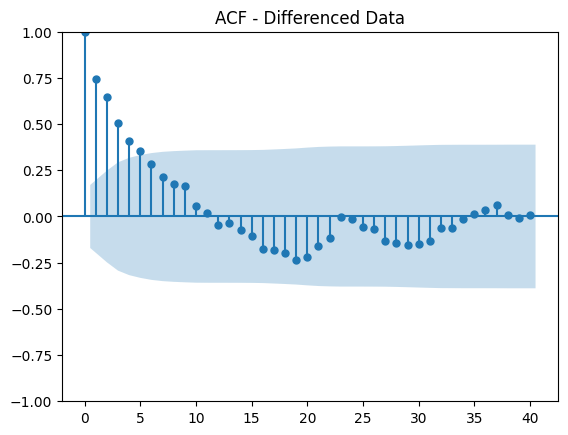

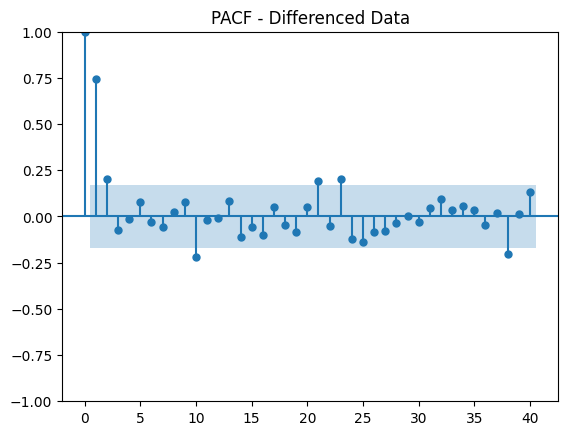

In [37]:
plt.figure(figsize=(15,15))
plot_acf(ts_diff, lags=40)
plt.title("ACF - Differenced Data")
plt.show()

plot_pacf(ts_diff, lags=40)
plt.title("PACF - Differenced Data")
plt.show()

# Smoothing the data

- Using a 7-month Simple Moving Average

In [21]:
sma_7 = ts.rolling(window=7).mean()

- Using a 30-month Simple Moving Average

In [22]:
sma_30 = ts.rolling(window=30).mean()

- Using Exponential Moving Average with(span=20)

In [23]:
ema_20 = ts.ewm(span=20, adjust=False).mean()

- Overlaying all on the Original Plot

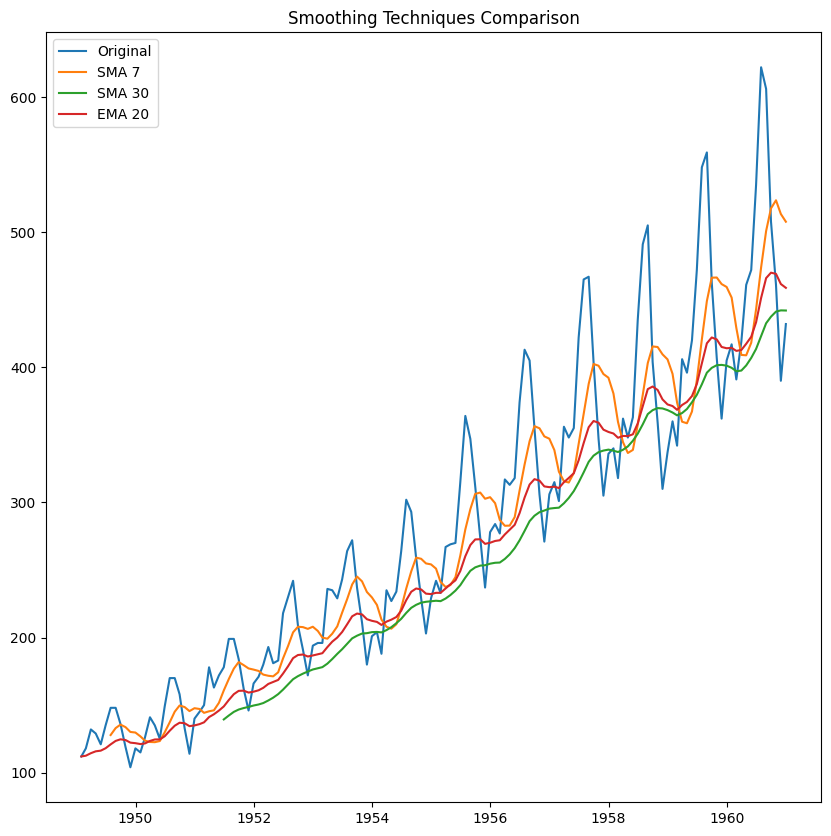

In [26]:
plt.figure(figsize=(10,10))

plt.plot(ts, label="Original")
plt.plot(sma_7, label="SMA 7")
plt.plot(sma_30, label="SMA 30")
plt.plot(ema_20, label="EMA 20")

plt.legend()
plt.title("Smoothing Techniques Comparison")
plt.show()

- It is observed that AirPassengers data series shows a clear upward trend that has strong seasonal fluctuations.
- The 7-month SMA has a reduced short-term noise that preserves most of the seasonal pattern with a slight lag.
- The 30-month SMA produces a much smoother curve that introduces a signficant lag and dampens the seasonal peaks.
- The EMA (span=20) effectively smoothens the series while being responsive to the recent changes compared to the large window.
- I conclude by saying that the EMA has a better preservation of the overall shape of the data while reducing the noise